In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
tc_df = pd.read_csv('Telco_Customer_Churn_Data (1) (1) (2).csv')


In [12]:
class teleco:
    """
       Initialize class with dataframe
    """
    def __init__(self,tc_df):
        self.tc_df = tc_df
    """ 
        Displays dataset 
    """
    def Dataframe(self):
        return self.tc_df
        
    """ 
       Information of the dataset
    """
    def Basic_info(self):
        return self.tc_df.info()

    """ 
       rows and columns count
    """
    def Count_of_rows_columns(self):
        return self.tc_df.shape

    """ 
       Indexing 
    """
    def indexing(self):
        return self.tc_df.index
    """ 
       Checking null values
    """
    def null_value_sum(self):
        return self.tc_df.isnull().sum()
    """
       Returns count of customers grouped by Partner status
    """
    def Customer_count(self,col1,col2):
        return self.tc_df.groupby(col1)[col2].count().reset_index()

    """
       Returns churn counts
    """
    def churn_rate(self,col):
        return self.tc_df[col].value_counts().reset_index()
        
    """
       Returns senior citizen percentage
    """
    def senior_citizen_percent(self,col):
        return self.tc_df[col].mean()*100
        
    """ 
       Gender counts 
    """
    def gender_counts(self,col):
        return self.tc_df[col].value_counts().reset_index()

    """ 
       Rate of partner's are in
    """
    def partner(self,col):
        partner_rate = (self.tc_df[col] == 'Yes').mean()*100
        return partner_rate
        
    """ 
       payment method counts
    """
    def payment_method(self,col):
        return self.tc_df[col].value_counts().reset_index()
        
    """ 
       avg tenure
    """
    def avg_tenure(self,col):
        return self.tc_df[col].mean()

    """ 
       calculating outliers 
    """
    def Outliers(self, col):
        Q1 = self.tc_df[col].quantile(0.25)
        Q3 = self.tc_df[col].quantile(0.75)
        IQR = Q3 - Q1 # inter quartile range
    
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
    
        outliers = self.tc_df[(self.tc_df[col] < lower_bound) | (self.tc_df[col] > upper_bound)]
        print(f"Lower Bound: {lower_bound}")
        print(f"Upper Bound: {upper_bound}")
        print(f"Number of outliers: {len(outliers)}")
        return

    """correlation among the columns with target column
       integer columns"""
    def Correlation(self):
        continious_var = self.tc_df.select_dtypes(include=['int64','float64']).columns.tolist()
        correlated = []
        target = 'MonthlyCharges'

        for col in continious_var:
            if col != target:  #  comparing all continious variable columns  with target
                result = np.corrcoef(self.tc_df[col], self.tc_df[target])[0][1]
                if abs(result) :
                    correlated.append((col, target, round(result, 3)))
            
        # Print results
        for pair in correlated:
            print(f"{pair[0]} vs {pair[1]}  => correlation: {pair[2]}")

        return

    """
       Heat map
    """

    def heat_map(self, col1, col2):
        """Generate a heatmap showing correlation between two columns."""
        plt.figure(figsize=(6, 4))
        sns.heatmap(self.tc_df[[col1, col2]].corr(), annot=True, cmap='coolwarm')
        plt.title(f'Correlation Heatmap: {col1} vs {col2}')
        plt.show()

    """
       heatmap for numeric data correlation 
    """
    def heat_map(self):
        numeric_df = self.tc_df.select_dtypes(include=np.number)
        corr = numeric_df.corr()
        sns.heatmap(corr, annot=True, cmap='coolwarm')
        plt.show()

    """ 
       violin plot 
    """
    def violin_plot(self, col1, col2):
        plt.figure(figsize=(12,8))
        sns.violinplot(data=self.tc_df, x= col1, y= col2, palette="Set3")
        plt.title(f"Distribution of {col2} by {col1}")
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.xticks()
        plt.show()

    """ 
       Scatter plot
    """   
    def Scatter_plot(self,col1,col2):
        plt.figure(figsize=(12,8))
        sns.scatterplot(data=self.tc_df, x= col1, y= col2, hue= col2 , palette="viridis")
        plt.title(f"Scatter Plot of {col2} vs {col1}")
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.xticks()
        plt.show()

    """ 
       Plot a pie chart
    """
    def plot_pie_chart(self, col):
        counts = self.tc_df[col].value_counts()
        plt.figure(figsize=(7,7))
        plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
        plt.title(f'Distribution of {col}')
        plt.axis('equal')
        plt.show()

    """ 
       Create a 3D scatter plot
    """
    def Surface_plot(self, col1, col2, col3):
        plt = px.scatter_3d(
            self.tc_df,
            x= col1,
            y= col2,
            z= col3,
            color= col2,
            size_max=10,
            opacity=0.8,
            title='3D Plot for MonthlyCharges, tenure, TotalCharges ',
            labels={
                'MonthlyCharges': 'MonthlyCharges',
                'tenure': 'tenure',
                'TotalCharges': 'TotalCharges'}
        )
        plt.show()

    """ 
       Box plot 
    """
    def Box_plot(self, columns):
        plt.figure(figsize=(12,8))
        sns.boxplot(data=self.tc_df[columns], palette="Set2")
        plt.title("Box Plot of charges")
        plt.xlabel("charges")
        plt.ylabel("count")
        plt.show()


        


    
    
        
        
        
        

        
        
        
        

In [18]:
#Infer SQL types from pandas dtypes
def infer_sql_types(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'TIMESTAMP'
    else:
        return 'TEXT'
table_name = 'Telco_Customer_Churn_Data (1) (1) (2)'
columns = tc_df.dtypes
sql_columns = ',\n '.join([f'"{col}"{infer_sql_types(dtype)}' for col, dtype in columns.items()])

create_stmt = f"""
CREATE TABLE IF NOT EXISTS {table_name} (
 {sql_columns}
);
"""

print(create_stmt)


CREATE TABLE IF NOT EXISTS Telco_Customer_Churn_Data (1) (1) (2) (
 "customerID"TEXT,
 "gender"TEXT,
 "SeniorCitizen"INT,
 "Partner"TEXT,
 "Dependents"TEXT,
 "tenure"INT,
 "PhoneService"TEXT,
 "MultipleLines"TEXT,
 "InternetService"TEXT,
 "OnlineSecurity"TEXT,
 "OnlineBackup"TEXT,
 "DeviceProtection"TEXT,
 "TechSupport"TEXT,
 "StreamingTV"TEXT,
 "StreamingMovies"TEXT,
 "Contract"TEXT,
 "PaperlessBilling"TEXT,
 "PaymentMethod"TEXT,
 "MonthlyCharges"FLOAT,
 "TotalCharges"TEXT,
 "Churn"TEXT
);



In [21]:
import psycopg2
conn = psycopg2.connect(
    dbname = "postgres",
    user="postgres",
    password="@Venkat2252",
    host="localhost",
    port="5432"
)

cur = conn.cursor()
# Create table manually here or auto-generate
cur.execute(create_stmt)
conn.commit()

# Auto-generate INSERT statement
columns = list(tc_df.columns)
placeholders = ', '.join(['%s'] * len(columns))
insert_stmt = f"""INSERT INTO {table_name} ({', '.join(['"{}"'.format(col) for col in columns])}) 
VALUES ({placeholders})
"""

# Insert data row by row
for _, row in tc_df.iterrows():
    cur.execute(insert_stmt, tuple(row))

conn.commit()
cur.close()
conn.close()

SyntaxError: syntax error at or near "1"
LINE 2: ...TE TABLE IF NOT EXISTS Telco_Customer_Churn_Data (1) (1) (2)...
                                                             ^


In [13]:
teleco = teleco(tc_df)

In [14]:
teleco.Dataframe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [15]:
teleco.Basic_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
teleco.Count_of_rows_columns()

(7043, 21)

In [7]:
teleco.indexing()

RangeIndex(start=0, stop=7043, step=1)

In [8]:
teleco.null_value_sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
teleco.Customer_count("Partner","customerID")

,Partner,customerID
0,No,3641
1,Yes,3402


In [10]:
teleco.churn_rate("Churn")

,Churn,count
0,No,5174
1,Yes,1869


In [11]:
teleco.senior_citizen_percent("SeniorCitizen")

np.float64(16.21468124378816)

In [227]:
teleco.gender_counts("gender")

,gender,count
0,Male,3555
1,Female,3488


In [228]:
teleco.partner("Partner")

np.float64(48.30327985233565)

In [229]:
teleco.payment_method("PaymentMethod")

,PaymentMethod,count
0,Electronic check,2365
1,Mailed check,1612
2,Bank transfer (automatic),1544
3,Credit card (automatic),1522


In [163]:
teleco.avg_tenure("tenure")

np.float64(32.37114865824223)

In [164]:
teleco.Correlation()

SeniorCitizen vs MonthlyCharges  => correlation: 0.22
tenure vs MonthlyCharges  => correlation: 0.248


In [165]:
teleco.Outliers("tenure")

Lower Bound: -60.0
Upper Bound: 124.0
Number of outliers: 0


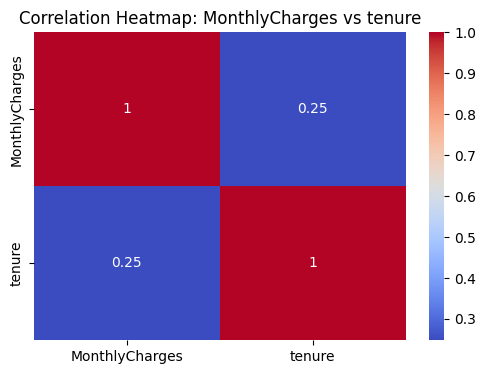

In [171]:
teleco.heat_map('MonthlyCharges','tenure')

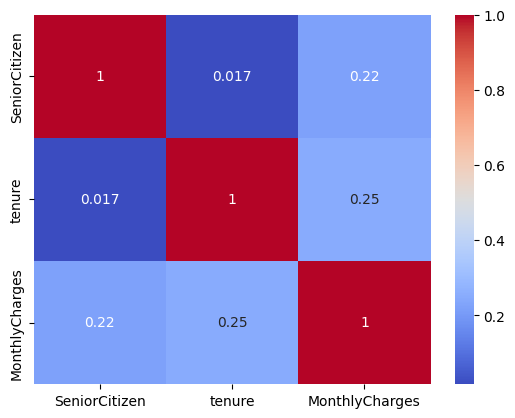

In [178]:
teleco.heat_map()

/var/folders/rt/fm3xxqs57bg3zrhms2_xp_zr0000gn/T/ipykernel_2837/2965760544.py:139: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=self.tc_df, x= col1, y= col2, palette="Set3")


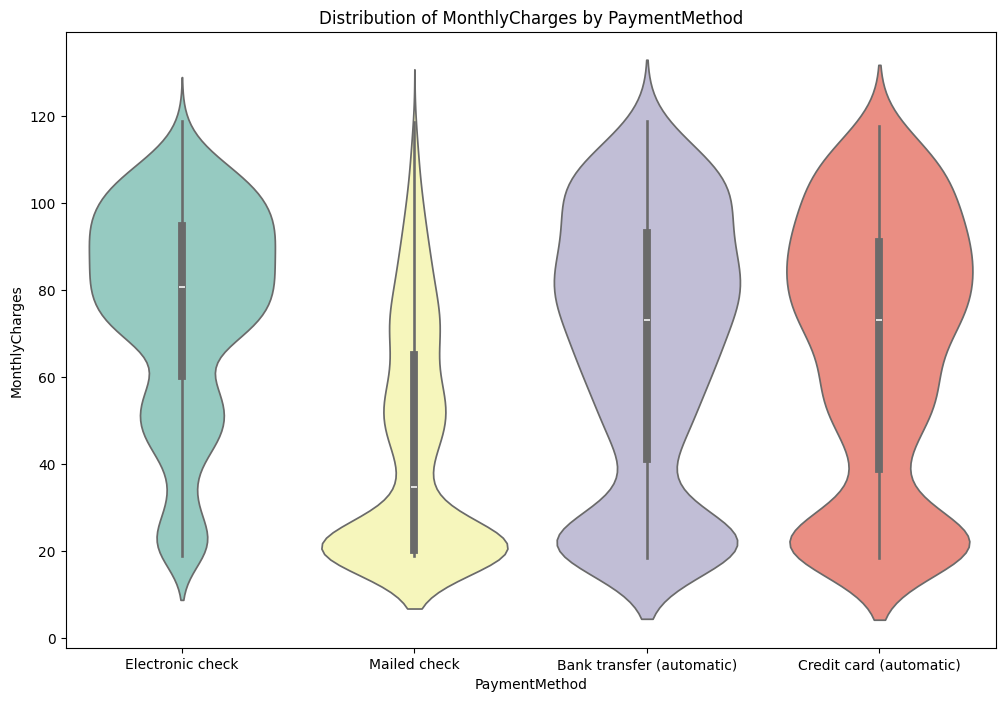

In [198]:
teleco.violin_plot("PaymentMethod","MonthlyCharges")

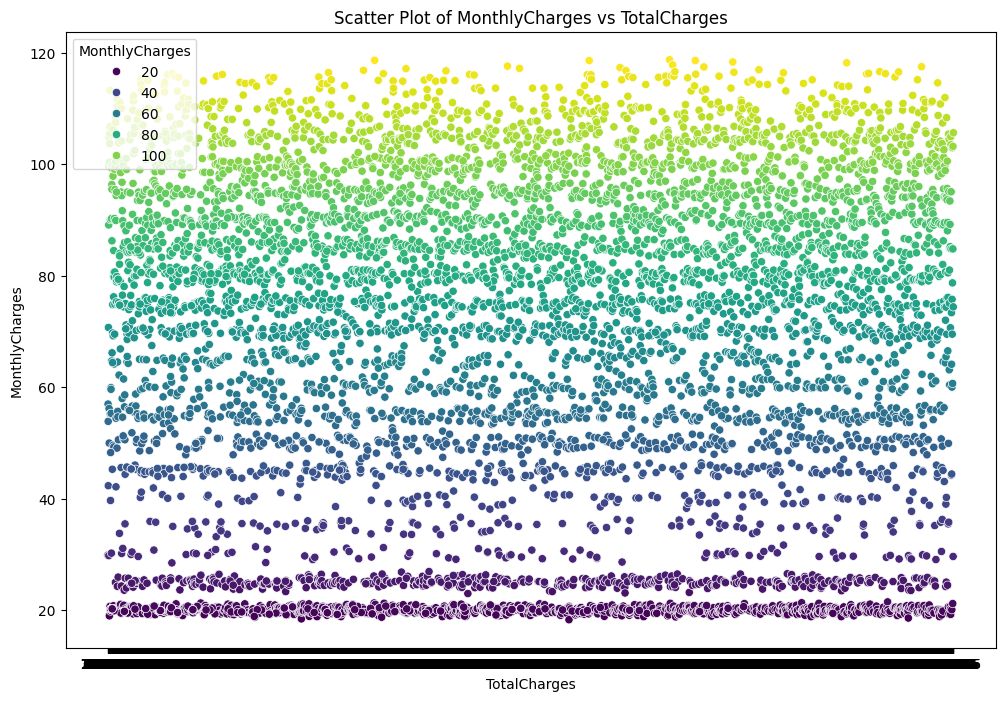

In [210]:
teleco.Scatter_plot("TotalCharges","MonthlyCharges")

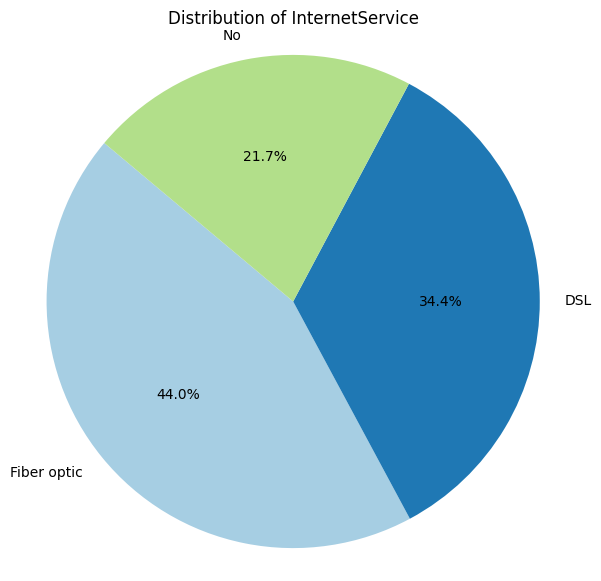

In [189]:
teleco.plot_pie_chart("InternetService")

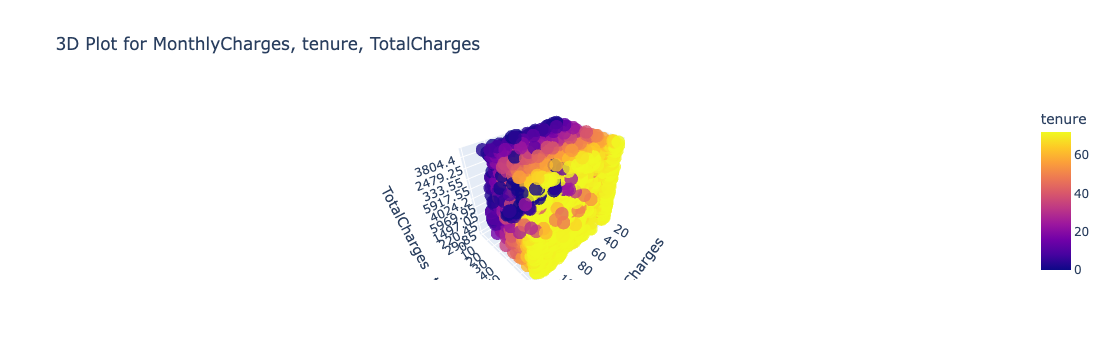

In [230]:
teleco.Surface_plot("MonthlyCharges","tenure","TotalCharges")

In [215]:
teleco

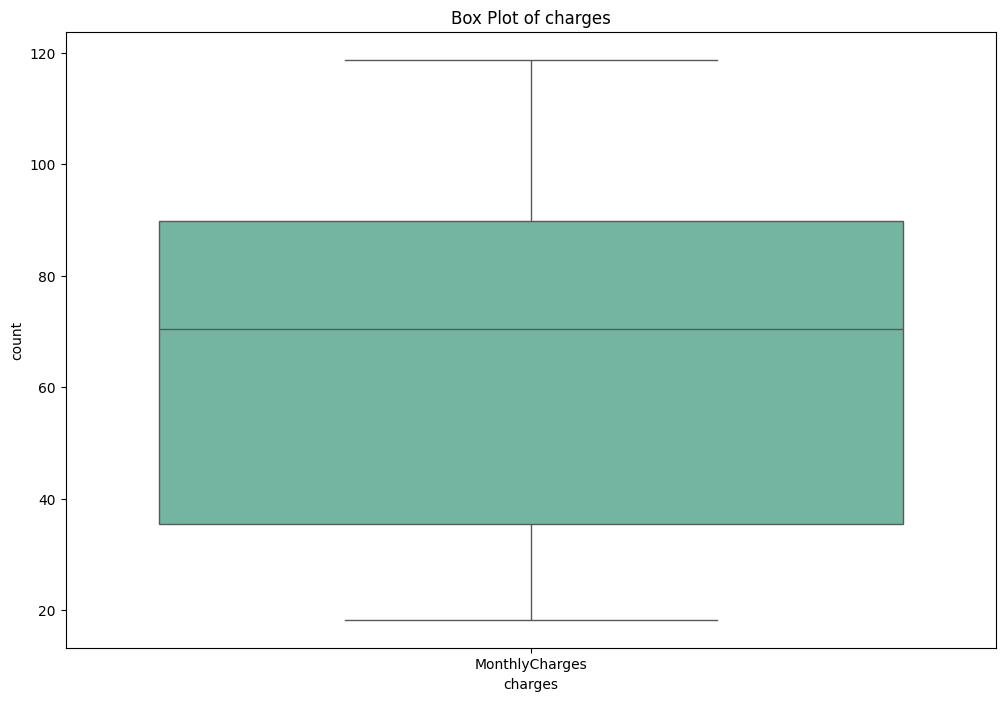

In [234]:
columns = ["TotalCharges","MonthlyCharges"]
teleco.Box_plot(columns)

In [22]:
import re
import psycopg2

# --- 1. Sanitize table name (important!) ---
table_name = 'Telco_Customer_Churn_Data (1) (1) (2)'
clean_table_name = re.sub(r'\W+', '_', table_name)  # Replace special chars with underscores

# --- 2. Infer SQL types from pandas dtypes ---
def infer_sql_types(dtype):
    import pandas as pd
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'TIMESTAMP'
    else:
        return 'TEXT'

columns = tc_df.dtypes
sql_columns = ',\n '.join([f'"{col}" {infer_sql_types(dtype)}' for col, dtype in columns.items()])

# --- 3. Generate CREATE TABLE statement ---
create_stmt = f"""
CREATE TABLE IF NOT EXISTS {clean_table_name} (
 {sql_columns}
);
"""

# --- 4. Connect to PostgreSQL ---
conn = psycopg2.connect(
    dbname="postgres",
    user="postgres",
    password="@Venkat2252",
    host="localhost",
    port="5432"
)

cur = conn.cursor()

# --- 5. Create table ---
cur.execute(create_stmt)
conn.commit()

# --- 6. Prepare INSERT statement ---
columns_list = list(tc_df.columns)
placeholders = ', '.join(['%s'] * len(columns_list))
insert_stmt = f"""
INSERT INTO {clean_table_name} ({', '.join(['"{}"'.format(col) for col in columns_list])})
VALUES ({placeholders});
"""

# --- 7. Insert data efficiently (bulk insert) ---
data = [tuple(row) for row in tc_df.to_numpy()]
cur.executemany(insert_stmt, data)
conn.commit()

cur.close()
conn.close()

print(f"✅ Data inserted successfully into table: {clean_table_name}")


✅ Data inserted successfully into table: Telco_Customer_Churn_Data_1_1_2_
